<center><h1>Gunadi_Eben_HW8</h1></center>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import defaultdict
from sklearn.cluster import KMeans, SpectralClustering
from spectralcluster import SpectralClusterer
from scipy.spatial import distance
from scipy.stats import mode
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
wdbc_filepath = '../data/wdbc.csv'

wdbc_header = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


wdbc_df = pd.read_csv(wdbc_filepath, names=wdbc_header, index_col='id', delimiter=',', encoding='utf-8')

In [3]:
wdbc_df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
wdbc_df.shape

(569, 31)

### (b) Monte-Carlo Simulation

Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positive and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### (i) Supervised Learning

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

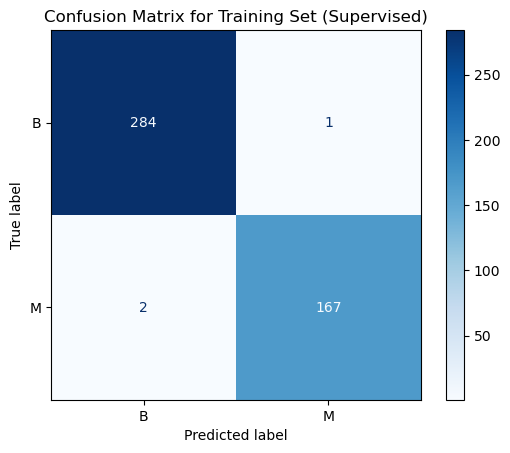

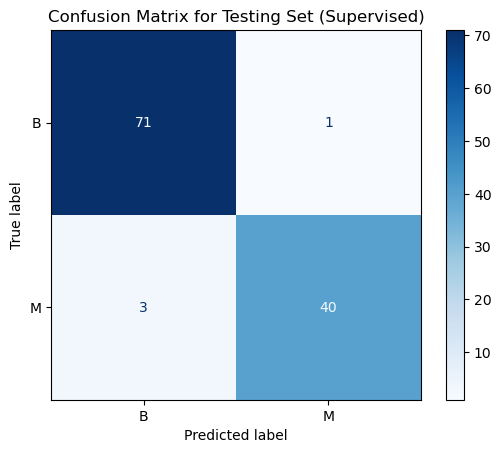

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [5]:
# Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

# Drop the diagnosis column
X = wdbc_df.drop('diagnosis', axis=1)
y = wdbc_df['diagnosis']

# Convert the diagnosis column to binary
y = y.map({'M': 1, 'B': 0})

# Repeat the experiment M = 30 times
M = 30

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []
test_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an L1-penalized SVM to classify the data
    svm = LinearSVC(penalty='l1', dual=False)

    # Create a parameter grid for GridSearchCV
    param_grid = {'C': np.logspace(-4, 4, 9)}

    # Perform GridSearchCV with SVM and parameter grid to
    # determine weights of the SVM penalty (C)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from GridSearchCV
    best_params = grid_search.best_params_

    # Train the L1-penalized SVM with the best parameters
    best_svm = LinearSVC(penalty='l1', dual=False, C=best_params['C'])
    best_svm.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    test_auc_list.append(test_auc)

    # Plot the ROC and report the confusion matrix for training and testing in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['B', 'M'], cmap='Blues') 
        
        plt.title('Confusion Matrix for Training Set (Supervised)')
        plt.show()
        
        cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Testing Set (Supervised)')
        plt.show()
        
        # Calculate probabilities for ROC curve
        y_train_prob = best_svm.decision_function(X_train)
        y_test_prob = best_svm.decision_function(X_test)

        # Calculate the ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        roc_auc_train = auc(fpr_train, tpr_train)
        roc_auc_test = auc(fpr_test, tpr_test)

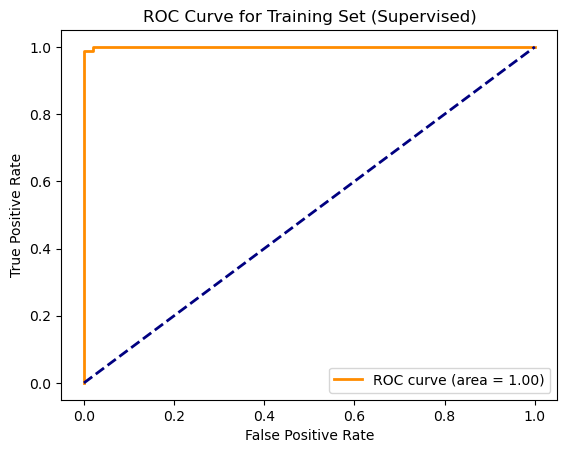

In [6]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Supervised)')
plt.legend(loc='lower right')
plt.show()

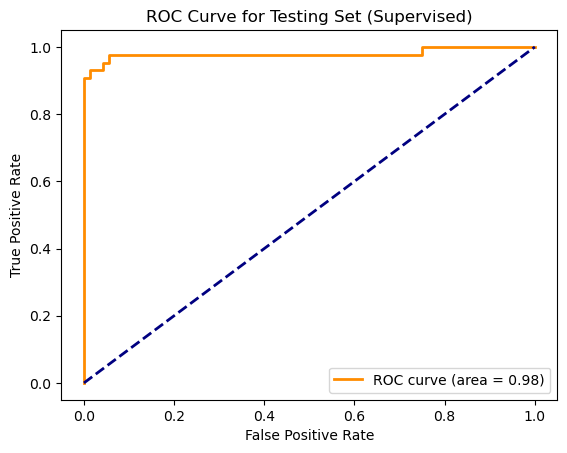

In [7]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (Supervised)')
plt.legend(loc='lower right')
plt.show()

In [8]:
# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs

supervised_learning_metrics = defaultdict(list)

supervised_learning_metrics['train_accuracy'] = train_accuracy_list
supervised_learning_metrics['train_precision'] = train_precision_list
supervised_learning_metrics['train_recall'] = train_recall_list
supervised_learning_metrics['train_f1_score'] = train_f1_score_list
supervised_learning_metrics['train_auc'] = train_auc_list

supervised_learning_metrics['test_accuracy'] = test_accuracy_list
supervised_learning_metrics['test_precision'] = test_precision_list
supervised_learning_metrics['test_recall'] = test_recall_list
supervised_learning_metrics['test_f1_score'] = test_f1_score_list
supervised_learning_metrics['test_auc'] = test_auc_list

supervised_learning_metrics_df = pd.DataFrame(supervised_learning_metrics)

supervised_train_metrics_avg = supervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()
supervised_test_metrics_avg = supervised_learning_metrics_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_auc']].mean()

print('Average Supervised Learning Metrics for Training Set')
print(supervised_train_metrics_avg)
print('\nAverage Supervised Learning Metrics for Testing Set')
print(supervised_test_metrics_avg)

Average Supervised Learning Metrics for Training Set
train_accuracy     0.985903
train_precision    0.990928
train_recall       0.971006
train_f1_score     0.980850
train_auc          0.982871
dtype: float64

Average Supervised Learning Metrics for Testing Set
test_accuracy     0.972754
test_precision    0.978284
test_recall       0.948837
test_f1_score     0.962667
test_auc          0.967937
dtype: float64


#### (ii) Semi-Supervised Learning/ Self-training

Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

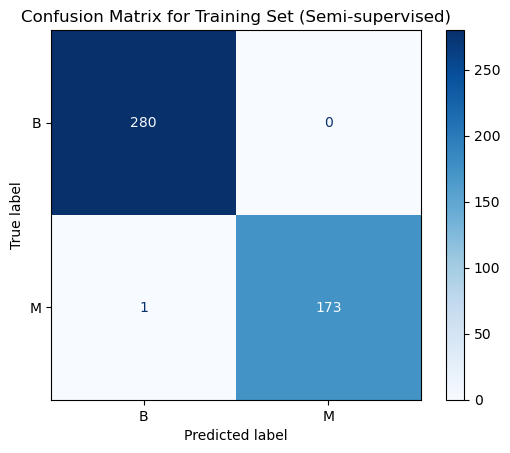

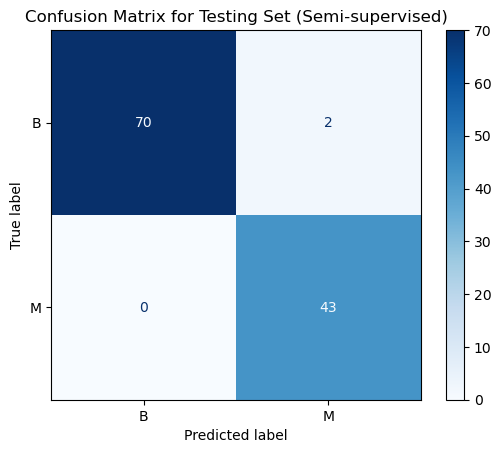

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [9]:
# (A) Train an L1-penalized SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

# (B) Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []
test_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    # Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
    X_train_pos, X_unlabeled_pos, y_train_pos, y_unlabeled_pos = train_test_split(X_train_pos, y_train_pos, test_size=0.5, random_state=i)
    X_train_neg, X_unlabeled_neg, y_train_neg, y_unlabeled_neg = train_test_split(X_train_neg, y_train_neg, test_size=0.5, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    X_unlabeled = pd.concat([X_unlabeled_pos, X_unlabeled_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])
    y_unlabeled = pd.concat([y_unlabeled_pos, y_unlabeled_neg])

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_unlabeled = scaler.transform(X_unlabeled)

    # After scaling, convert X_train and X_unlabeled back to DataFrame for easier handling
    X_train = pd.DataFrame(X_train, index=y_train.index)  # Assuming y_train.index holds the correct indices
    X_unlabeled = pd.DataFrame(X_unlabeled, columns=X_train.columns)  # Use the same columns as X_train

    # Train an L1-penalized SVM to classify the data
    svm = LinearSVC(penalty='l1', dual=False)

    # Create a parameter grid for GridSearchCV
    param_grid = {'C': np.logspace(-4, 4, 9)}

    # Perform GridSearchCV with SVM and parameter grid to
    # determine weights of the SVM penalty (C)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from GridSearchCV
    best_params = grid_search.best_params_

    # Train the L1-penalized SVM with the best parameters
    best_svm = LinearSVC(penalty='l1', dual=False, C=best_params['C'])
    best_svm.fit(X_train, y_train)

    # Label the unlabeled data
    while len(X_unlabeled) > 0:
        # Find the unlabeled data point that is the farthest to the decision boundary of the SVM
        farthest_distance = -np.inf  # Reset for each iteration
        farthest_index = None

        for j in range(len(X_unlabeled)):
            # Calculate the distance of each unlabeled data point to the decision boundary
            distance_calculated = best_svm.decision_function([X_unlabeled.iloc[j]])[0]

            if distance_calculated > farthest_distance:
                farthest_distance = distance_calculated
                farthest_index = j

        # Label the unlabeled data point that is the farthest to the decision boundary of the SVM
        X_train = pd.concat([X_train, X_unlabeled.iloc[[farthest_index]]])
        y_train = pd.concat([y_train, pd.Series(best_svm.predict([X_unlabeled.iloc[farthest_index]]), index=[X_unlabeled.index[farthest_index]])])

        # Remove or mark this instance as used in `X_unlabeled`
        X_unlabeled = X_unlabeled.drop(X_unlabeled.index[farthest_index])

        # Retrain the L1-penalized SVM with the best parameters and the newly labeled data
        best_svm.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    test_auc_list.append(test_auc)

    # Plot the ROC and report the confusion matrix for training and testing in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Semi-supervised)')
        plt.show()

        cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Testing Set (Semi-supervised)')
        plt.show()

        # Calculate probabilities for ROC curve
        y_train_prob = best_svm.decision_function(X_train)
        y_test_prob = best_svm.decision_function(X_test)

        # Calculate the ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        roc_auc_train = auc(fpr_train, tpr_train)
        roc_auc_test = auc(fpr_test, tpr_test)

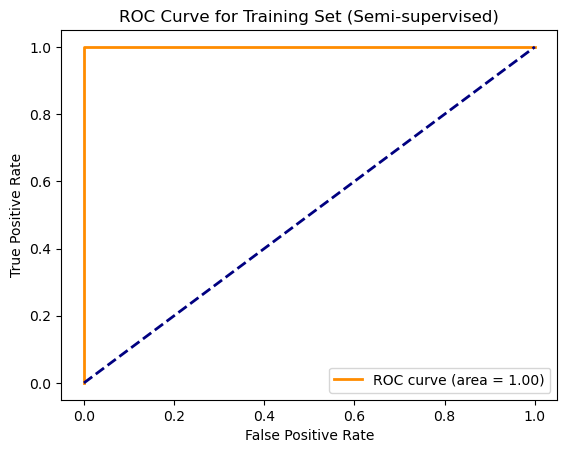

In [10]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Semi-supervised)')
plt.legend(loc='lower right')
plt.show()

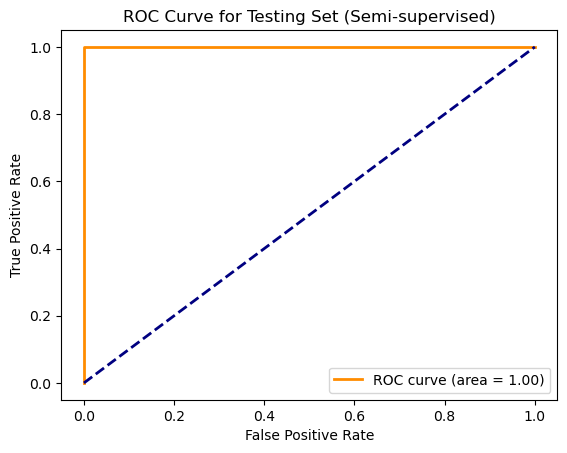

In [11]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set (Semi-supervised)')
plt.legend(loc='lower right')
plt.show()

In [12]:
# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs

semi_supervised_learning_metrics = defaultdict(list)

semi_supervised_learning_metrics['train_accuracy'] = train_accuracy_list
semi_supervised_learning_metrics['train_precision'] = train_precision_list
semi_supervised_learning_metrics['train_recall'] = train_recall_list
semi_supervised_learning_metrics['train_f1_score'] = train_f1_score_list
semi_supervised_learning_metrics['train_auc'] = train_auc_list

semi_supervised_learning_metrics['test_accuracy'] = test_accuracy_list
semi_supervised_learning_metrics['test_precision'] = test_precision_list
semi_supervised_learning_metrics['test_recall'] = test_recall_list
semi_supervised_learning_metrics['test_f1_score'] = test_f1_score_list
semi_supervised_learning_metrics['test_auc'] = test_auc_list

semi_supervised_learning_metrics_df = pd.DataFrame(semi_supervised_learning_metrics)

semi_supervised_train_metrics_avg = semi_supervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()
semi_supervised_test_metrics_avg = semi_supervised_learning_metrics_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_auc']].mean()

print('Average Semi-supervised Learning Metrics for Training Set')
print(semi_supervised_train_metrics_avg)
print('\nAverage Semi-supervised Learning Metrics for Testing Set')
print(semi_supervised_test_metrics_avg)

Average Semi-supervised Learning Metrics for Training Set
train_accuracy     0.991189
train_precision    0.993728
train_recall       0.982908
train_f1_score     0.988265
train_auc          0.989560
dtype: float64

Average Semi-supervised Learning Metrics for Testing Set
test_accuracy     0.969565
test_precision    0.961255
test_recall       0.958140
test_f1_score     0.959122
test_auc          0.967264
dtype: float64


#### (iii) Unsupervised Learning

Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


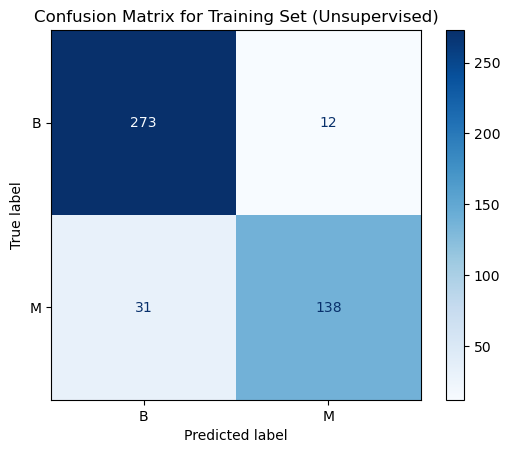

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/clus

In [13]:
# (A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

# (B) Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

# Per footnote 2:
# K-means algorithm does not provide probabilities, so one can use the distances from cluster center and pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by varying the threshold for majority polling. Usually, a majority is achieved when t = 50% of the data are in a class. One can vary t and obtain an ROC curve.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data while keeping it as a DataFrame
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=2, random_state=i)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    labels = np.zeros_like(kmeans.labels_)
 
    for j in range(2): # For each cluster
        # Calculate distances of all points to the cluster center
        cluster_dist = distance.cdist(X_train, [centers[j]])

        # Get indices of 30 closest points
        closest_indices = np.argsort(cluster_dist.ravel())[:30]
        closest_points = X_train.index[closest_indices]

        # Majority vote
        vote_result = mode(y_train.loc[closest_points])
        label = vote_result.mode

        # Assign this label to all points in the cluster
        labels[kmeans.labels_ == j] = label

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training set
    train_accuracy = accuracy_score(y_train, labels)
    train_precision = precision_score(y_train, labels)
    train_recall = recall_score(y_train, labels)
    train_f1_score = f1_score(y_train, labels)
    train_auc = roc_auc_score(y_train, labels)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    # Plot the ROC and report the confusion matrix for training in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, labels, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Unsupervised)')
        plt.show()

        # Compute distances to cluster centers
        distances = kmeans.transform(X_train)

        # Apply softmax to negative distances (since closer points should have higher "probability")
        probabilities = softmax(-distances, axis=1)

        # Use probabilities corresponding to the "positive" cluster for ROC curve calculation
        positive_cluster_index = 0 if np.mean(labels[kmeans.labels_ == 0]) > 0.5 else 1
        y_scores = probabilities[:, positive_cluster_index]

        # Calculate the ROC curve and AUC using these scores
        fpr_train, tpr_train, _ = roc_curve(y_train, y_scores)
        roc_auc_train = auc(fpr_train, tpr_train)     

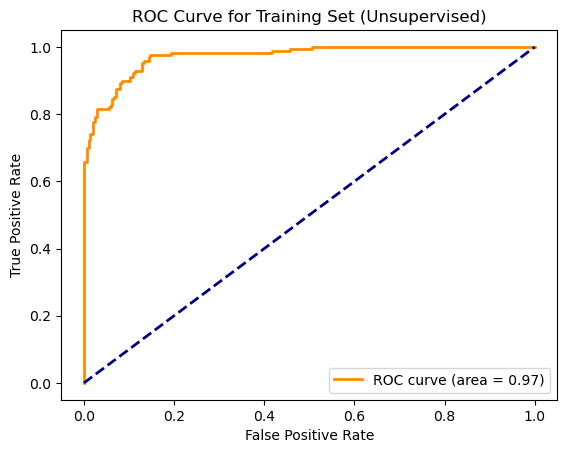

In [14]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Unsupervised)')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Report the average accuracy, precision, recall, F1-score, and AUC for the training set over your M runs

unsupervised_learning_metrics = defaultdict(list)

unsupervised_learning_metrics['train_accuracy'] = train_accuracy_list
unsupervised_learning_metrics['train_precision'] = train_precision_list
unsupervised_learning_metrics['train_recall'] = train_recall_list
unsupervised_learning_metrics['train_f1_score'] = train_f1_score_list
unsupervised_learning_metrics['train_auc'] = train_auc_list

unsupervised_learning_metrics_df = pd.DataFrame(unsupervised_learning_metrics)

unsupervised_train_metrics_avg = unsupervised_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()

print('Average Unsupervised Learning Metrics for Training Set')
print(unsupervised_train_metrics_avg)

Average Unsupervised Learning Metrics for Training Set
train_accuracy     0.908811
train_precision    0.920725
train_recall       0.826627
train_f1_score     0.870922
train_auc          0.892086
dtype: float64


Local minimum is avoided by running this process multiple times with randomized initialization parameters.

#### (iv) Spectral Clustering

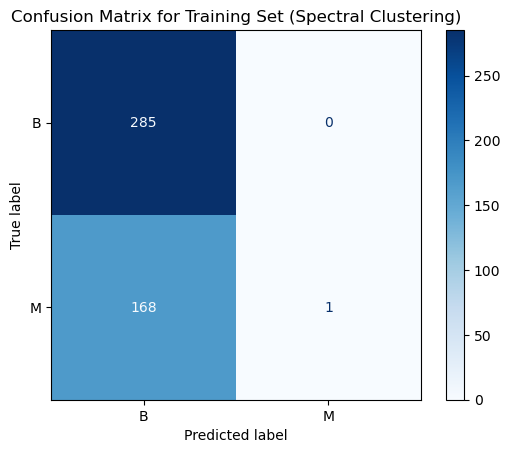

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebengunadi/anaconda3/

In [179]:
# Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusters have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

# Per footnote 3:
# Because Spectral Clustering will not give you cluster centers, instead of considering 30 closest data points to the center, consider labeling based on either 30 randomly selected data points or the entire points in each cluster. Also, for ROC curves, you can vary the threshold of majority polling to obtain an ROC.

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data while keeping it as a DataFrame
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

    # Perform Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=i)
    labels_spectral = spectral.fit_predict(X_train)

    # Convert labels_spectral to a DataFrame for easier manipulation
    labels_df = pd.DataFrame(labels_spectral, columns=['Cluster'], index=X_train.index)

    # Join with the true labels for majority polling
    clustered_data = labels_df.join(y_train.rename('TrueLabel'))

    # Determine the majority label for each cluster
    majority_labels = clustered_data.groupby('Cluster')['TrueLabel'].agg(lambda x: x.mode()[0])

    # Map the majority labels back to the original labels
    # Note: labels_assigned contains the adjusted labels based on majority polling within each cluster
    labels_assigned = labels_df['Cluster'].map(majority_labels)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training set
    train_accuracy = accuracy_score(y_train, labels_assigned)
    train_precision = precision_score(y_train, labels_assigned)
    train_recall = recall_score(y_train, labels_assigned)
    train_f1_score = f1_score(y_train, labels_assigned)
    train_auc = roc_auc_score(y_train, labels_assigned)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    # Plot the ROC and report the confusion matrix for training in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, labels_assigned, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Training Set (Spectral Clustering)')
        plt.show()

        # Calculate probabilities for ROC curve
        distances = spectral.affinity_matrix_
        probabilities = softmax(-distances, axis=1)

        # Use probabilities corresponding to the "positive" cluster for ROC curve calculation
        positive_cluster_index = 0 if np.mean(labels_assigned) > 0.5 else 1
        y_scores = probabilities[:, positive_cluster_index]

        # Calculate the ROC curve and AUC using these scores
        fpr_train, tpr_train, _ = roc_curve(y_train, y_scores)
        roc_auc_train = auc(fpr_train, tpr_train)



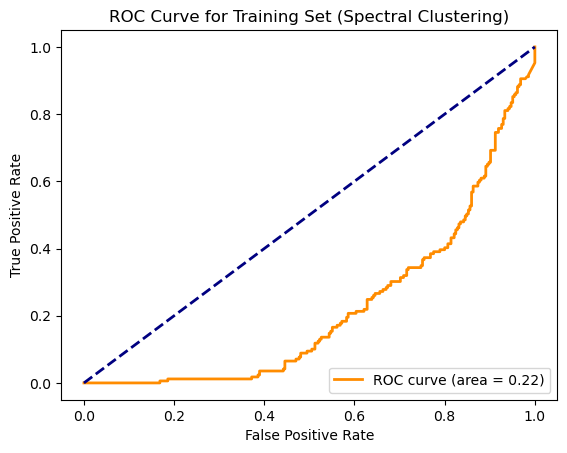

In [180]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set (Spectral Clustering)')
plt.legend(loc='lower right')
plt.show()

In [181]:
# Report the average accuracy, precision, recall, F1-score, and AUC for the training set over your M runs

spectral_learning_metrics = defaultdict(list)

spectral_learning_metrics['train_accuracy'] = train_accuracy_list
spectral_learning_metrics['train_precision'] = train_precision_list
spectral_learning_metrics['train_recall'] = train_recall_list
spectral_learning_metrics['train_f1_score'] = train_f1_score_list
spectral_learning_metrics['train_auc'] = train_auc_list

spectral_learning_metrics_df = pd.DataFrame(spectral_learning_metrics)

spectral_train_metrics_avg = spectral_learning_metrics_df[['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 'train_auc']].mean()

print('Average Spectral Learning Metrics for Training Set')
print(spectral_train_metrics_avg)

Average Spectral Learning Metrics for Training Set
train_accuracy     0.630543
train_precision    0.800000
train_recall       0.007495
train_f1_score     0.014838
train_auc          0.503748
dtype: float64


#### (v) Compare

As expected, supervised learning had the highest accuracy, having a mean test accuracy of 0.972754. Semi-supervised and unsupervised came in second and third, with a respective mean test accuracy of 0.969565 and mean train accuracy of 0.908811. Spectral clustering was horrendous, failing to even identify a substantial amount of true positives. Perhaps the implementation is faulty, but please note that I spent many hours researching, refactoring the code, and testing various parameters.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

#### (ii) Active

### (c) Average the 50 test errors

## References and Citations

- https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
- https://stackoverflow.com/questions/70106288/what-is-the-relationship-between-classification-report-and-precision-score
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html
- https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/
- https://stackoverflow.com/questions/40658486/impossible-to-set-the-gamma-parameter-for-the-spectral-clustering-function-in-sk
- https://pypi.org/project/spectralcluster/
- https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf (Chapter 9)